In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [178]:
import matplotlib as mpl

In [188]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [88]:
def gen_s():
    s = []
    for i in range(10,990,10):
        s.append(np.arange(i,i+11,1))
    return s
s = gen_s()

In [89]:
def gen_k():
    k = []
    for i in range(100,9900,100):
        k.append(np.arange(i,i+110,10))
    return k
k = gen_k()

In [130]:
def rate(arr_s,arr_k):
    arr_r = []
    for s in range(len(arr_k)):
        for k in range(len(arr_s)):
            val_d = arr_k[s]-arr_s[k]
            val_r = round(val_d/arr_s[k],3)
            arr_r.append([arr_s[k],arr_k[s],val_r])
    for i in range(len(arr_r)):
        if arr_r[i][2] >= 3 and arr_r[i][2] <= 9.0:
            arr_r[i].append("m")
        elif arr_r[i][2] < 3:
            arr_r[i].append("l")
        elif arr_r[i][2] > 9.0:
            arr_r[i].append("g")
    return sorted(arr_r)

In [449]:
r_0_0 = rate(s[33],k[33])
x = [i[0] for i in r_0_0]
y = [i[1] for i in r_0_0]
z = [i[2] for i in r_0_0]
o = [i[3] for i in r_0_0]
df =pd.DataFrame(r_0_0,columns=["s","k","r","level"])
df.head()

,s,k,r,level
0,340,3400,9.000,m
1,340,3410,9.029,g
2,340,3420,9.059,g
3,340,3430,9.088,g
4,340,3440,9.118,g


In [451]:
s[33]

array([340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350])

In [452]:
k[33]

array([3400, 3410, 3420, 3430, 3440, 3450, 3460, 3470, 3480, 3490, 3500])

<Axes: >

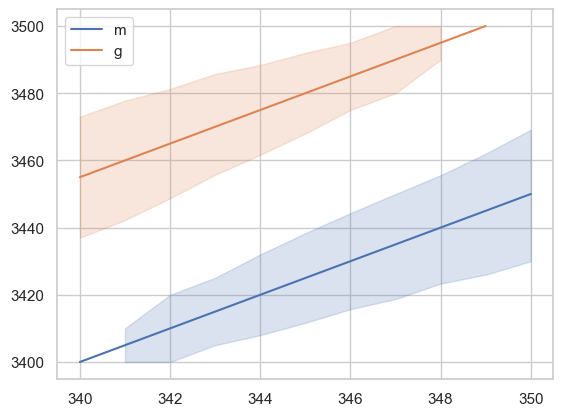

In [453]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=x, y=y,
             hue=o)

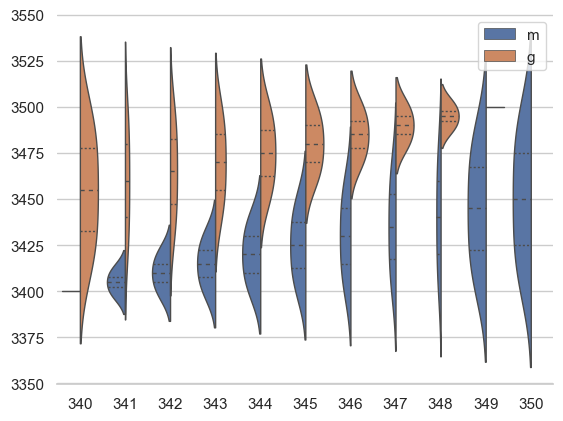

In [456]:
sns.violinplot(x=x, y=y, hue=o,
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)

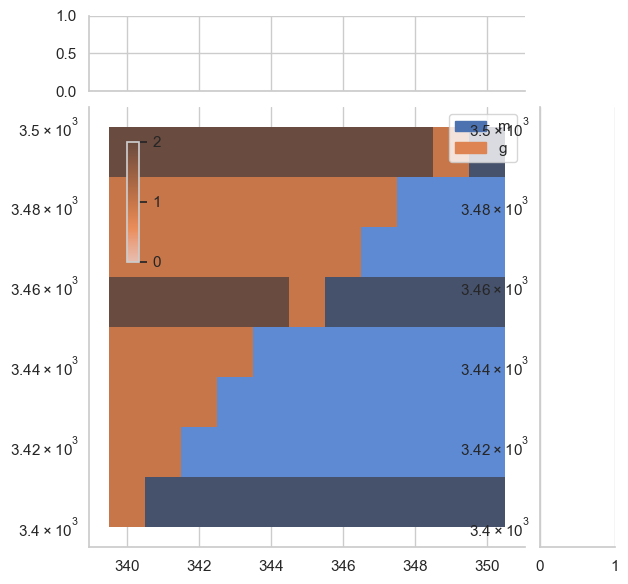

In [467]:
g = sns.JointGrid(hue=o,x=x, y=y, marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, 
    discrete=(True, False),
    pmax=.8,
    cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

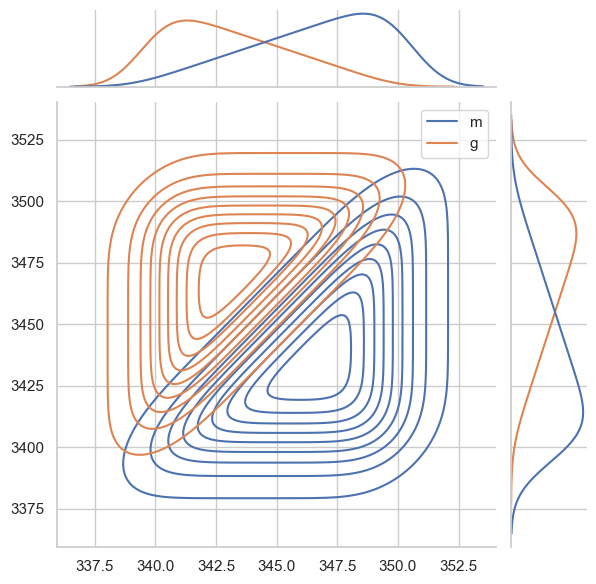

In [468]:
g = sns.jointplot(
    x=x, y=y, hue=o,
    kind="kde",
)